<img src="images/logo/selene-logo-640.png" style="max-height:75px;" alt="SELENE Logo" />

**Disclaimer:** This Jupyter Notebook contains content generated with the assistance of AI. While every effort has been made to review and validate the outputs, users should independently verify critical information before relying on it. The SELENE notebook repository is constantly evolving. We recommend downloading or pulling the latest version of this notebook from Github.

# Part-of-Speech (POS) Tagging (Basics)

## Introduction

### Part-of-Speech (POS) Tags

A part-of-speech (POS) tag is a label assigned to a word in a sentence to indicate its grammatical category and syntactic function. It identifies the role the word plays in the structure of a sentence, such as whether it acts as a noun, verb, adjective, adverb, or other categories. POS tagging is a crucial step in natural language processing (NLP) and computational linguistics, as it helps to analyze and understand the grammatical relationships within a sentence. In English, there are generally eight main parts of speech that form the foundation of the language's grammatical system. These include:

* **Nouns:** Words that represent people, places, things, or ideas (e.g., *"dog"*, *"city"*).
* **Pronouns:** Words that substitute for nouns (e.g., *"he"*, *"they"*).
* **Verbs:** Words that express actions, occurrences, or states of being (e.g., *"run"*, *"is"*).
* **Adjectives:** Words that describe or modify nouns (e.g., *"beautiful"*, *"tall"*).
* **Adverbs:** Words that modify verbs, adjectives, or other adverbs (e.g., *"quickly"*, *"very"*).
* **Prepositions:** Words that show relationships between a noun (or pronoun) and another word (e.g., *"on"*, *"before"*).
* **Conjunctions:** Words that connect words, phrases, or clauses (e.g., *"and"*, *"but"*).
* **Interjections:** Words that express strong emotion or exclamation (e.g., *"Wow!"*, *"Ouch!"*).

Some linguistic frameworks expand this list to include additional categories, such as articles, determiners, and auxiliary verbs, to capture finer grammatical distinctions; as we will see later in action. For instance, determiners like "the" or "some" are often treated as a separate category to emphasize their specific function in identifying or quantifying nouns. With respect to their Part-of-Speech, words can be classified into two broad categories

* **Closed-class Words:** Closed-class words refer to prepositions (e.g., *"from"*, *"to"*, *"with"*), pronouns (e.g., *"I/me"*, *"she/her"*, *"he/him"*), particles (e.g., *"off"*, *"up"*), determiners (e.g., *"the"*, *"a/an"*), conjunctions (e.g., *"and"*, *"or"*, *"but"*), but also auxiliary verbs (e.g., *"can"*, *"have"*). These words typically do not carry much semantic meaning in themselves but are considered function words to sentences a proper grammatical structure. The set of closed-class words is relatively small and, for all intents and purposes, of a fixed size &mdash; for example, it is very unlikely that a new preposition or determiner is added to the English language.

* **Open-class Words:** Open-class or content words common nouns (e.g., *"cat"*, *"dog"*, *"house"*), proper nouns (e.g., *"Alice"*, *"Singapore"*, *"Apple"*), main verbs (e.g., *"go"*, *"swim"*, *"learn"*), adjectives (e.g., *"nice"*, *"helpful"*, *"tall"*), adverbs (e.g., *"quickly"*, *"loudly"*, *"always"*), but also numbers (e.g., *"123"*, *"3.14"*) or interactions (e.g., *"Oh!"*, *"Wow!"*). This set of words is practically impossible to completely enumerate as new words are continuously being invented, borrowed, etc.


### Part-of-Speech (POS) Tagging

Part-of-speech (POS) tagging is the process of assigning POS tags to each word in a sentence, based on its context and role. These tags indicate the word's syntactic function, such as whether it is a noun, verb, adjective, or other part of speech. POS tagging serves as a foundational step in natural language processing (NLP), enabling machines to analyze and understand the structure of human language. Knowing the POS tags for words in a text is very useful or even crucial for many downstream tasks:

* **Lemmatization:** select correct lemma given a word and its POS tag
* **Word Disambiguation:** the same word might have different roles depending on the context (e.g., "I saw a bear[noun]. " vs "Bear[verb] with me!")
* **Named Entity Recognition:** named entities (i.e., the names of persons, organization, locations) are typically comprised of nouns and proper nouns
* **Information Extractions:** verbs commonly indicate relations between entities (which are typically nouns or proper nouns)
* **Parsing:** information of word class is useful before creating parse trees
* **Speech synthesis/recognition:** the same word might be pronounced differently depending on its POS tag (e.g., noun "DIScount" vs. verb "disCOUNT")
* **Authorship Attribution:** the relative frequencies of nouns, verbs, adjectives, etc. often reflects the writing style of a specific author
* **Machine Translation:** e.g., reordering of adjectives and nouns in the target language

Modern POS tagging methods range from rule-based approaches to statistical and deep learning models. Early systems relied on predefined grammatical rules and dictionaries, while more advanced methods use machine learning to predict tags based on labeled datasets. Tools like spaCy and NLTK utilize these approaches to provide high accuracy and flexibility in tagging diverse text inputs. These models can handle nuances like idiomatic expressions, slang, or complex sentence structures, making them indispensable for robust language processing.

### Setting up the Notebook

#### Make Required Imports

This notebook requires the import of different Python packages but also additional Python modules that are part of the repository. If a package is missing, use your preferred package manager (e.g., [conda](https://anaconda.org/anaconda/conda) or [pip](https://pypi.org/project/pip/)) to install it. If the code cell below runs with any errors, all required packages and modules have successfully been imported.

In [1]:
from src.utils.libimports.postag import *
from src.utils.plotting.postag import *
from src.utils.data.files import *

#### Download Required Data

Some code examples in this notebook use data that first need to be downloaded by running the code cell below. If this code cell throws any error, please check the configuration file `config.yaml` if the URL for downloading datasets is up to date and matches the one on Github. If not, simply download or pull the latest version from Github.

In [2]:
yelp_review, _ = download_dataset("text/corpora/misc/yelp-reviews-mon-ami-gabi.csv")

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 850k/850k [00:00<00:00, 11.9MiB/s]


---

## POS Tag Sets

A POS tag set is predefined collections of part-of-speech labels used to categorize words based on their grammatical role in a sentence. Different POS tag sets exist because languages vary in their grammatical structures, and linguistic tasks often require varying levels of detail and specificity; more specifically, the reasons for different tag sets are:

* **Linguistic Variability:** Languages have unique grammatical structures and features, requiring tailored tag sets. For instance, English heavily relies on word order for meaning, while languages like Russian or Latin use inflectional morphology. Consequently, POS tag sets for each language may need to accommodate these differences.

* **Level of Granularity:** Applications such as basic text classification task often require only coarse-grained tags (e.g., "noun," "verb"), while application such as syntactic parsers might need more fine-grained distinctions (e.g., "singular noun," "past-tense verb"). 

* **Standardization Across Datasets:** Some tag sets aim to provide universal applicability across languages, like the Universal POS (UPOS) tag set. Others, like the Penn Treebank or CLAWS tag set, are designed for specific corpora or projects.

For a concrete example, we can look at the two POS tag sets supported by spaCy. Firstly, the [Universal POS tags](https://universaldependencies.org/u/pos/) are a set of 17 standardized grammatical categories designed to be language-independent and provide a coarse-grained annotation of parts of speech. They are part of the Universal Dependencies project, which aims to create a uniform framework for linguistic annotation across languages. Here is the list of Universal POS tags with descriptions:

| **Tag**   | **Description**                                                                          | **Examples**                       |
|-----------|------------------------------------------------------------------------------------------|------------------------------------|
| `ADJ`     | **Adjective**: Describes a noun or pronoun                                               | *big, green*                       |
| `ADP`     | **Adposition**: Prepositions and postpositions                                           | *on, under*                        |
| `ADV`     | **Adverb**: Modifies verbs, adjectives, or other adverbs                                 | *quickly, very*                    |
| `AUX`     | **Auxiliary**: Verbs that provide grammatical support                                    | *is, have*                         |
| `CCONJ`   | **Coordinating Conjunction**: Links words, phrases, or clauses equally                   | *and, but*                         |
| `DET`     | **Determiner**: Introduces a noun phrase                                                 | *the, a*                           |
| `INTJ`    | **Interjection**: Expresses emotion or exclamation                                       | *wow, oh*                          |
| `NOUN`    | **Noun**: Refers to people, places, things, or concepts                                  | *dog, idea*                        |
| `NUM`     | **Numeral**: Indicates a number                                                          | *three, 42*                        |
| `PART`    | **Particle**: Function words that do not fit other categories                            | *not, to* in *to go*               |
| `PRON`    | **Pronoun**: Substitutes for a noun                                                      | *she, they*                        |
| `PROPN`   | **Proper Noun**: Refers to specific names of people, places, or organizations            | *John, Paris*                      |
| `PUNCT`   | **Punctuation**: Symbols that delimit text                                               | *., !, ?*                          |
| `SCONJ`   | **Subordinating Conjunction**: Introduces a subordinate clause                           | *because, although*                |
| `SYM`     | **Symbol**: Non-alphanumeric symbols                                                     | *%, $, +*                          |
| `VERB`    | **Verb**: Expresses actions, occurrences, or states                                      | *run, think*                       |
| `X`       | **Other**: Words that do not belong to other categories or are hard to classify.         |                                    |

For a more fine-grained tagging, spaCy also supports the [Penn Treevank](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html) tag set. The Penn Treebank POS Tag Set is a fine-grained set of 36 part-of-speech tags developed for annotating the Penn Treebank, a corpus of parsed English text. It is widely used in natural language processing (NLP) tasks and is specific to English. The Penn Treebank tags provide detailed distinctions between different grammatical roles, offering greater granularity than universal POS tags. The complete list of tags is given in the table below.

| **Tag**  | **Description**                                                   | **Examples**                   |
|----------|-------------------------------------------------------------------|--------------------------------|
| `CC`     | Coordinating conjunction                                          | *and, but, or*                 |
| `CD`     | Cardinal number                                                   | *one, two, 3*                  |
| `DT`     | Determiner                                                        | *the, a, an*                   |
| `EX`     | Existential "there"                                               | *there*                        |
| `FW`     | Foreign word                                                      | *d’accord, vis-à-vis*          |
| `IN`     | Preposition or subordinating conjunction                          | *in, of, like, because*        |
| `JJ`     | Adjective                                                         | *big, red, fast*               |
| `JJR`    | Adjective, comparative                                            | *bigger, faster*               |
| `JJS`    | Adjective, superlative                                            | *biggest, fastest*             |
| `LS`     | List item marker                                                  | *1., A., a)*                   |
| `MD`     | Modal                                                             | *can, could, should*           |
| `NN`     | Noun, singular or mass                                            | *dog, car, music*              |
| `NNS`    | Noun, plural                                                      | *dogs, cars, ideas*            |
| `NNP`    | Proper noun, singular                                             | *John, London*                 |
| `NNPS`   | Proper noun, plural                                               | *Americans, Rockies*           |
| `PDT`    | Predeterminer                                                     | *all, both, half*              |
| `POS`    | Possessive ending                                                 | *’s*                           |
| `PRP`    | Personal pronoun                                                  | *I, you, he, she, it*          |
| `PRP$`   | Possessive pronoun                                                | *my, your, his*                |
| `RB`     | Adverb                                                            | *quickly, very, not*           |
| `RBR`    | Adverb, comparative                                               | *faster, better*               |
| `RBS`    | Adverb, superlative                                               | *fastest, best*                |
| `RP`     | Particle                                                          | *up, off, out*                 |
| `SYM`    | Symbol                                                            | *%, $, +*                      |
| `TO`     | "to"                                                              | *to* (as in *to go*)           |
| `UH`     | Interjection                                                      | *oh, wow, hmm*                 |
| `VB`     | Verb, base form                                                   | *run, eat*                     |
| `VBD`    | Verb, past tense                                                  | *ran, ate*                     |
| `VBG`    | Verb, gerund or present participle                                | *running, eating*              |
| `VBN`    | Verb, past participle                                             | *eaten, driven*                |
| `VBP`    | Verb, non-3rd person singular present                             | *run, eat*                     |
| `VBZ`    | Verb, 3rd person singular present                                 | *runs, eats*                   |
| `WDT`    | Wh-determiner                                                     | *which, that*                  |
| `WP`     | Wh-pronoun                                                        | *who, what*                    |
| `WP$`    | Possessive wh-pronoun                                             | *whose*                        |
| `WRB`    | Wh-adverb                                                         | *where, when*                  |

Let's look at some examples. POS tagging is part of the default pipeline in spaCy because it is an essential task for many natural language processing applications and serves as a foundation for a wide range of subsequent linguistic analyses. In general, POS tagging is rarely the main application tasks, but the information about words POS task serves as crucial input for many downstream tasks such as syntactic or dependency parsing, named entity recognition, coreference resolution, and others. The code cell below shows the very simple steps required to use spaCy for POS tagging.

**Your turn:** Write your own sentences and let them be tagged by spaCy.

In [3]:
sentence = "Alice considered if she should switch from engineering to computer science."
#sentence = "A ticket for a direct flight from Singapore to Germany typically costs around S$1,000."
#sentence = "Wow! The movie was amazing with so many funny scenes and great acting."

# Analyze input text (incl. POS tagging!)
doc = nlp(sentence)

# Print results
for token in doc:
    print(f"{token.text} (Universal: {token.pos_}, Penn: {token.tag_})")

Alice (Universal: PROPN, Penn: NNP)
considered (Universal: VERB, Penn: VBD)
if (Universal: SCONJ, Penn: IN)
she (Universal: PRON, Penn: PRP)
should (Universal: AUX, Penn: MD)
switch (Universal: VERB, Penn: VB)
from (Universal: ADP, Penn: IN)
engineering (Universal: NOUN, Penn: NN)
to (Universal: ADP, Penn: IN)
computer (Universal: NOUN, Penn: NN)
science (Universal: NOUN, Penn: NN)
. (Universal: PUNCT, Penn: .)


---

## POS Tagging Algorithm

### Challenges

What makes the task of automatically assigning each word in a sentence its correct POS tag non trivial is the fact that many words can be used as different parts-of-speech. For example, the word *"back"* can be, depending on the context, an adjective, a noun, an adverb, or a very; here are four sentences for each instance:

* **Adjective:** *The <u>back</u> door is open.*
* **Noun:** *Her <u>back</u> was aching.*
* **Adverb:** *Please come <u>back</u> soon.*
* **Verb:** *He will <u>back</u> the proposal.*

We can directly check this with spaCy as well:

In [4]:
sentences = [
    "The back door is open.",
    "Her back was aching.",
    "Please come back soon.",
    "He will back the proposal."
]

for sentence in sentences:
    print(sentence)
    # Analyze input text (incl. POS tagging!)
    doc = nlp(sentence)
    # Print results
    for token in doc:
        print(f"\t{token.text} (Universal: {token.pos_}, Penn: {token.tag_})")

The back door is open.
	The (Universal: DET, Penn: DT)
	back (Universal: ADJ, Penn: JJ)
	door (Universal: NOUN, Penn: NN)
	is (Universal: AUX, Penn: VBZ)
	open (Universal: ADJ, Penn: JJ)
	. (Universal: PUNCT, Penn: .)
Her back was aching.
	Her (Universal: PRON, Penn: PRP$)
	back (Universal: NOUN, Penn: NN)
	was (Universal: AUX, Penn: VBD)
	aching (Universal: VERB, Penn: VBG)
	. (Universal: PUNCT, Penn: .)
Please come back soon.
	Please (Universal: INTJ, Penn: UH)
	come (Universal: VERB, Penn: VB)
	back (Universal: ADV, Penn: RB)
	soon (Universal: ADV, Penn: RB)
	. (Universal: PUNCT, Penn: .)
He will back the proposal.
	He (Universal: PRON, Penn: PRP)
	will (Universal: AUX, Penn: MD)
	back (Universal: VERB, Penn: VB)
	the (Universal: DET, Penn: DT)
	proposal (Universal: NOUN, Penn: NN)
	. (Universal: PUNCT, Penn: .)


In short, a good POS tagger cannot be implemented purely based on simple look ups. On the other hand, there are many words that indeed have only a single possible POS tag. For example, *"Alice"* is always a proper noun, *"quickly"* is always an adverb, *"the"* is always a determiner, and son. In fact, 80-85% of all words in the English language are unambiguous and can be assigned to only one POS tag. This means that 15-20% of words can be assigned with two or more tags. While this might seem like a reasonable low percentage, these 15-20% percent of words contain a lot of common words. When analyzing a large English text corpus, around 55-65% of words will be ambiguous.

### Naive Baseline Algorithm

Although many words in an average corpus might be ambiguous, we can use the information that some word have only a single POS tag to come with a very simple POS tagging algorithms; this algorithm include only three straightforward rules

* Label each unambiguous word with its respective POS tag
* Label each ambiguous but known word with its most frequent POS tag
* Label each unknown word as noun (the most frequent tag of open-class words)

Of course, this algorithm &mdash; particularly the second &mdash; requires some kind of dataset to derive how frequent different POS tags for the same word are. For resource languages such as English, such datasets are generally widely available. It turns out that this naive baseline algorithm achieves an average accuracy of 92%. While this sounds quite alright, there are two important things to consider:

* **Imbalanced errors:** The relative high accuracy is due to common/frequent unambiguous words (e.g., *"the"*, *"a/an"*, *"and"*, *"or"*). However, many of these words are also often not that interesting for most downstream tasks as those words usually carry a lot of meaningful information.

* **Downstream error propagation:** As mentioned before, POS tagging is generally the final output of a task or application, but the tags serve as an important (auxiliary) input for many downstream tasks. Thus, any errors made during POS tagging will propagate and potentially amplify in those downstream tasks.

While there are unsupervised machine learning algorithms for POS tagging, basically all practical implementations of POS taggers rely on supervised algorithms. This, again, requires meaningfully large and suitable annotated datasets for the training. For common English, such datasets are generally widely available, but this can pose a significant challenge for more low-resource languages where good training datasets do not (yet) exist. Assuming the availability of a large annotated dataset for training a POS tagger, different algorithms have been successfully used for task, incl.:

* Hidden Markov Models (HMM)
* Conditional Random Fields (CRF)
* Neural sequence models (RNNs, Transformers)
* Large language models (e.g., BERT)

For English, all these models yield state-of-the-art results with accuracy values of 97-98%. This means that modern POS taggers have reached the "human ceiling", which means those taggers perform as good as human annotators. The reason the human ceiling is not at 100% is simple due the fact the language can be so ambiguous that even humans may find it difficult to always correctly identify the correct POS tag. For example, consider the following two sentences:

* *"Flying planes can be dangerous."*
* *"Fruit flies like a banana"*

In the first sentence, *"flying"* can either be an adjective or verb. In the second case, *"flies"* can be a noun or verb, and *"like"* (depending on the choice for *"flies"*) can either be a verb or a preposition. In all those cases, it is completely up to a reader's or annotator's interpretation. Let's actually check how spaCy (and the used language model) would tag both sentences

In [5]:
sentences = [
    "Flying planes can be dangerous.",
    "Fruit flies like a banana."
]

for sentence in sentences:
    print(sentence)
    # Analyze input text (incl. POS tagging!)
    doc = nlp(sentence)
    # Print results
    for token in doc:
        print(f"\t{token.text} (Universal: {token.pos_}, Penn: {token.tag_})")

Flying planes can be dangerous.
	Flying (Universal: VERB, Penn: VBG)
	planes (Universal: NOUN, Penn: NNS)
	can (Universal: AUX, Penn: MD)
	be (Universal: AUX, Penn: VB)
	dangerous (Universal: ADJ, Penn: JJ)
	. (Universal: PUNCT, Penn: .)
Fruit flies like a banana.
	Fruit (Universal: NOUN, Penn: NN)
	flies (Universal: VERB, Penn: VBZ)
	like (Universal: ADP, Penn: IN)
	a (Universal: DET, Penn: DT)
	banana (Universal: NOUN, Penn: NN)
	. (Universal: PUNCT, Penn: .)


At least when using the `en_core_web_sm` language model, spaCy tags *"flying"* as verb, and *"flies"*/*"like"* as a verb/preposition. But keep in mind that a different language model might have returned different results. That being said, such cases are not overly common. Thus, for high-resource languages such as (common) English, POS tagging is generally considered a solved task. However, there are still challenges when it comes to low-resource languages or special application domains (e.g., with a very distinct and specialized vocabulary).

---

## Simple Application Example: Analysis of Restaurant Reviews

Lastly, let's look at a very simple but still very useful application of POS tagging within a concrete application scenario. In the following example, we want to analyze 1,000 Yelp reviews about the restaurant "Mon Ami Gabi" in Las Vegas (USA) to see which adjectives are most commonly used. The goal is a word cloud showing the most prominent adjectives used across all 1,000 reviews to get a good picture of what the users think about this restaurant.

- Link to restaurant on Yelp: https://www.yelp.com/biz/mon-ami-gabi-las-vegas-2


### Load reviews from CSV file

We use the `pandas` package for easy handling and reading CSV files. `pandas` uses the notion of *data frames* (df) to denote data objects.

In [6]:
df = pd.read_csv(yelp_review)

df.head()

,review_number,review
0,1,"Excellent food, great atmosphere, a bit noisy...."
1,2,If you enjoy a little people watching with you...
2,3,"affordable, fairly classic french foodsit outs..."
3,4,Though heartbroken and a bit aimless on my 22n...
4,5,"The food and wine was amazing, but the super h..."


The CSV file with the reviews and thus the data frame have two columns: the review number and the text of the review. Since we're only interested in the review texts, we can simply extract them into a list of strings.

In [7]:
reviews = df['review'].tolist() # "review" is the name of the column of interest (see above)

### Review analysis

For each review, we perform the following steps:
- Tokenize review and POS tag all tokens
- Check each token if it is an adjective
- If a token is an adjective, increase a counter for this adjective

In [8]:
# This dictionary will keep track of the count for each found adjective
adjective_frequencies = {}

# Check each review on by one
for review in tqdm(reviews):
    for token in nlp(review):
        # Ignore tokens that are not adjectives
        if token.pos_ != 'ADJ':
            continue
        # Convert token to lowercase, otherwise "Good" and "good" are considered differently
        adjective = token.text.lower()
        # Update counts/frequencies
        if adjective not in adjective_frequencies:
            adjective_frequencies[adjective] = 1.0
        else:
            adjective_frequencies[adjective] = adjective_frequencies[adjective] + 1.0

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:34<00:00, 28.75it/s]


With `adjective_frequencies`, we now have a dictionary where the keys are the adjectives and the values represent how often an adjective has occurred in all reviews. Let's have a look at a couple of examples.

In [9]:
# "Good" adjectives
print(adjective_frequencies['great'])
print(adjective_frequencies['amazing'])
print(adjective_frequencies['excellent'])
print()
# "Bad" adjectives
print(adjective_frequencies['disappointed'])
print(adjective_frequencies['pricey'])
print(adjective_frequencies['sad'])

811.0
170.0
155.0

17.0
32.0
9.0


We can see that adjectives associated with a positive sentiment are much more frequently used than adjectives typically associated with a negative sentiment. We can make the argument that "Mon Ami Gabi" is considered to be a good restaurant.

**Important:** Keep in mind that our approach of counting the occurrences of adjectives is to some extent a bit simplified. Most importantly, we do not consider negation here. For example, if a review would state "The food was not great", we would only count the occurrences of "great". For getting a high-level insight about the sentiment, such limitations are generally acceptable. However, one could refine the analysis, e.g., by ignoring all negated adjectives (you can think about why it's actually not that easy to check if an adjective is negated or not).

### Visualization of Results

While the dictionary `adjective_frequencies` contains all the important information, it's not a very convenient representation / visualization to show to a user looking for some kind of summary for a restaurant. However, the information about word frequencies (here: adjectives) lends itself to use a word cloud for visualization.

We use a readily available Python package ([`wordcloud`](https://anaconda.org/conda-forge/wordcloud)) for convenience. We also provide an auxiliary method `show_wordcloud()` that generates a word cloud given a dictionary of word frequencies. Feel free to have a look at the method's implementation in `src/utill.py`.

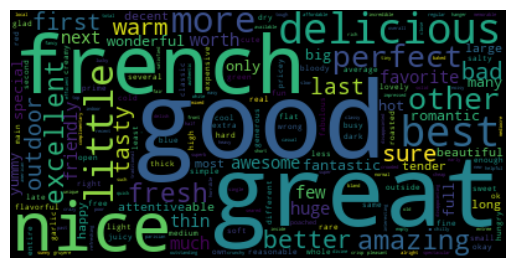

In [10]:
show_wordcloud(adjective_frequencies)

This word cloud arguably now provides a very easy way to capture the overall sentiment about the restaurant.

---

## Summary

Part-of-Speech (POS) tagging is a fundamental task in natural language processing (NLP) that involves assigning a grammatical category (e.g., noun, verb, adjective) to each word in a text. This process provides syntactic information about words, which is essential for understanding sentence structure and meaning. POS tagging is typically a preliminary step in many NLP pipelines, helping downstream tasks such as syntactic parsing, information retrieval, and sentiment analysis by providing richer context about the roles words play within sentences.

One of the key challenges in POS tagging is handling the ambiguity of natural language. Many words can serve multiple grammatical roles depending on their context. For example, the word *"book"* can be a noun (*"Read the book"*) or a verb (*"Book a table"*). Resolving such ambiguities requires leveraging contextual information, which often involves designing complex algorithms or models that can capture relationships between words in a sentence. Additionally, languages with free word order, rich morphology, or limited labeled data present further difficulties for POS tagging systems.

The importance of POS tagging lies in its ability to enhance the performance of numerous downstream tasks. For instance, in syntactic parsing, POS tags provide a foundational layer that helps disambiguate sentence structures. Similarly, in machine translation, knowing whether a word is a noun or a verb can guide the selection of appropriate equivalents in the target language. POS tagging is also crucial for tasks like named entity recognition (NER), where distinguishing proper nouns from common nouns improves accuracy.

Modern approaches to POS tagging leverage machine learning, especially deep learning, to address these challenges. Models like conditional random fields (CRFs), recurrent neural networks (RNNs), and transformers have significantly improved tagging accuracy, particularly in handling ambiguity and unseen data. However, achieving high accuracy across diverse languages and domains remains an ongoing challenge, making POS tagging a vibrant area of research and development in NLP.

In summary, POS tagging is a vital preprocessing step in NLP with a profound impact on downstream tasks. Its challenges, including lexical ambiguity and variability across languages, have driven advancements in statistical and neural methods. As NLP continues to evolve, robust POS tagging will remain an integral part of building systems that understand and generate human language effectively.